In [12]:
import pandas as pd
import numpy as np
import pylab as pl
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq, fft, ifft
from numpy.random import uniform
from math import sin, pi
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import signal

In [2]:
sns.set(rc={'figure.figsize': (12,8)})

## 50 Hz filtering

In [3]:
df_alpha = pd.read_csv("/home/alex/hack_neuro/записанные сигналы/alpha.dat", sep="\t", 
                 names=['ch0', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9']) \
                .reset_index()

In [5]:
df_alpha = df_alpha.drop(['ch7', 'ch8', 'ch9', 'index'], axis=1) # drop fake channels

In [ ]:
if df_alpha.ch1.shape[0] % 2 == 1:
    df_alpha = df_alpha.drop(index=[df_alpha.ch1.shape[0] - 1])

In [6]:
df_alpha

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,466,454,513,724,559,585,525
1,473,469,501,687,580,561,567
2,498,487,493,659,537,543,537
3,451,455,491,506,602,614,507
4,480,456,490,583,553,576,489
...,...,...,...,...,...,...,...
10009,524,520,533,519,481,567,528
10010,521,520,531,508,500,567,530
10011,515,508,529,493,504,530,515
10012,520,512,531,491,501,524,490


In [127]:
df_beta = pd.read_csv("/home/alex/hack_neuro/записанные сигналы/beta.dat", sep="\t", 
                 names=['ch0', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9']) \
                .reset_index()

In [128]:
df_beta = df_beta.drop(['ch7', 'ch8', 'ch9', 'index'], axis=1) # drop fake channels

In [160]:
if df_beta.ch1.shape[0] % 2 == 1:
    df_beta = df_beta.drop(index=[df_beta.ch1.shape[0] - 1])

In [129]:
df_beta

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,512,497,500,502,464,328,500
1,508,526,507,510,469,356,459
2,457,439,509,519,490,312,431
3,470,433,542,526,482,201,359
4,506,483,559,532,451,103,310
...,...,...,...,...,...,...,...
6108,551,555,514,677,473,532,542
6109,470,473,514,590,535,613,474
6110,489,465,514,479,532,562,514
6111,521,519,514,409,526,512,490


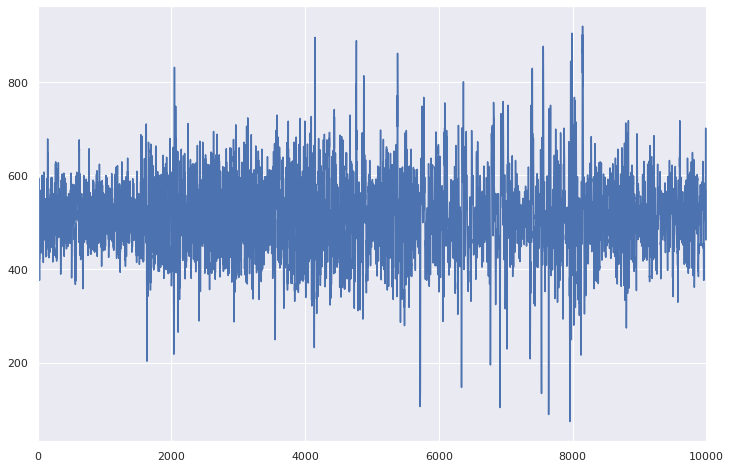

In [7]:
df_alpha["ch5"].plot()

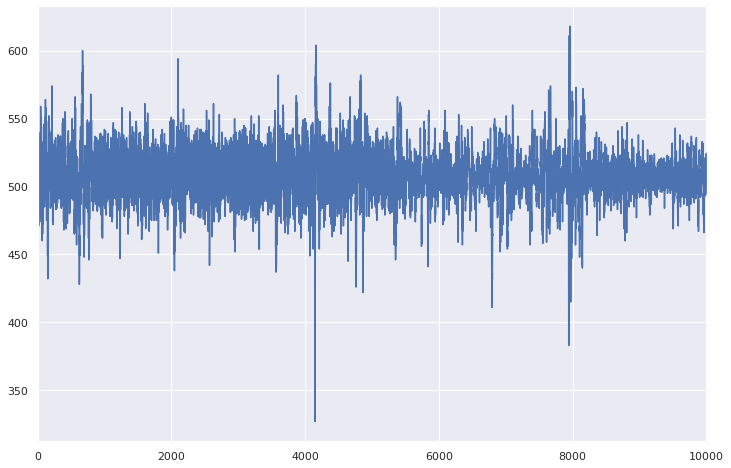

In [8]:
df_alpha.ch1.plot()

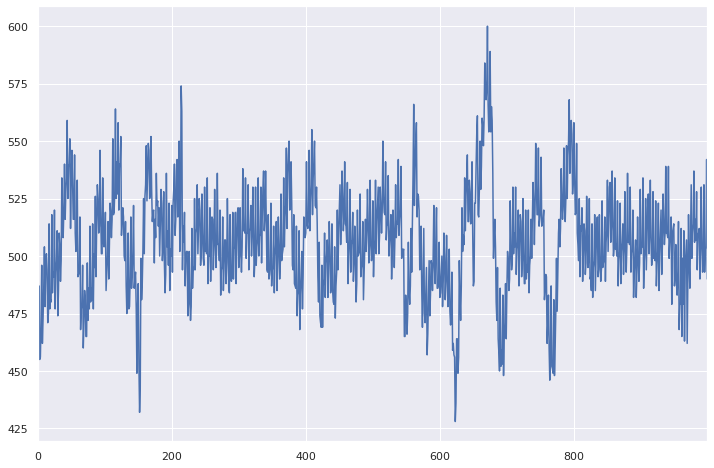

In [11]:
df_alpha["ch1"][:1000].plot()

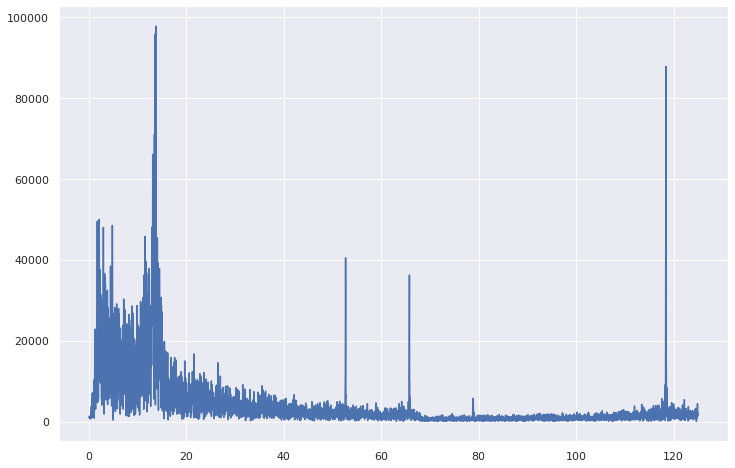

In [13]:
rate = 250.0
#t = np.arange(0, 10014, 1/rate)
x = df_alpha.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

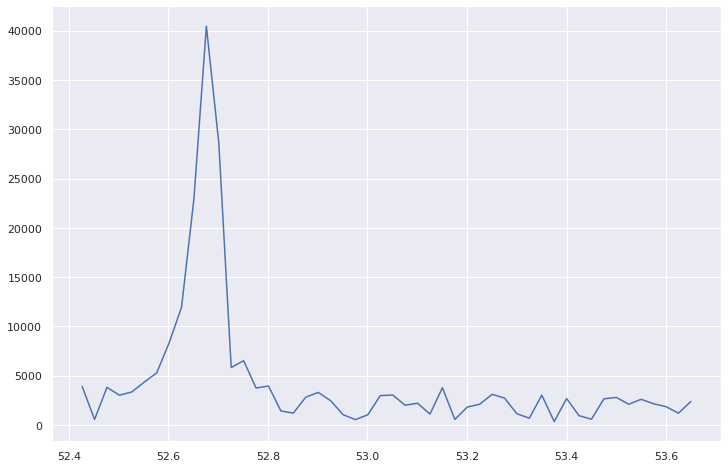

In [58]:
rate = 250.0
#t = np.arange(0, 10014, 1/rate)
x = df_alpha.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[2100:2150], p[2100:2150])

In [59]:
p[2105:2120]    # 52-53 Hz

array([ 4353.64169514,  5282.35741849,  8320.7544571 , 11937.01102384,
       22958.38829307, 40453.68945567, 28613.71524992,  5830.05053192,
        6524.08838382,  3752.93283099,  3951.33729888,  1427.15133602,
        1205.79329992,  2823.72249372,  3305.85765818])

In [62]:
data_filt = df_alpha.copy()

for signal_i in df_alpha.columns:
    signala = df_alpha[signal_i].copy() 
    fourier = np.fft.rfft(signala)
    fourier[2105:2120] = 0  # 52-53 Hz
    filter_signal = np.fft.irfft(fourier)
    data_filt[signal_i] = filter_signal


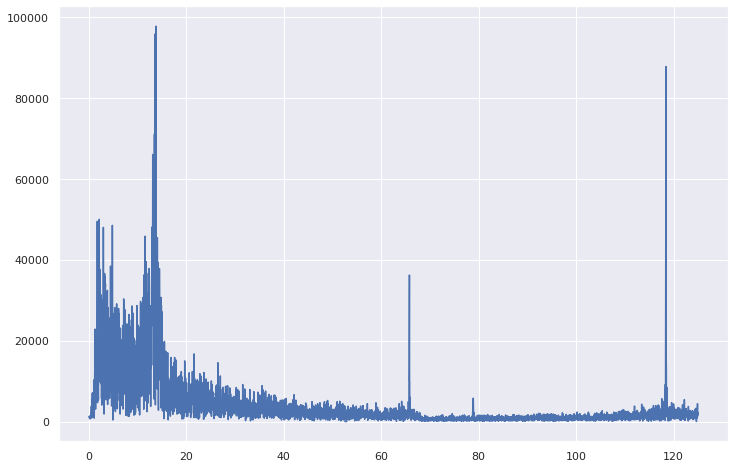

In [63]:
rate = 250.0
#t = np.arange(0, 10014, 1/rate)
x = data_filt.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

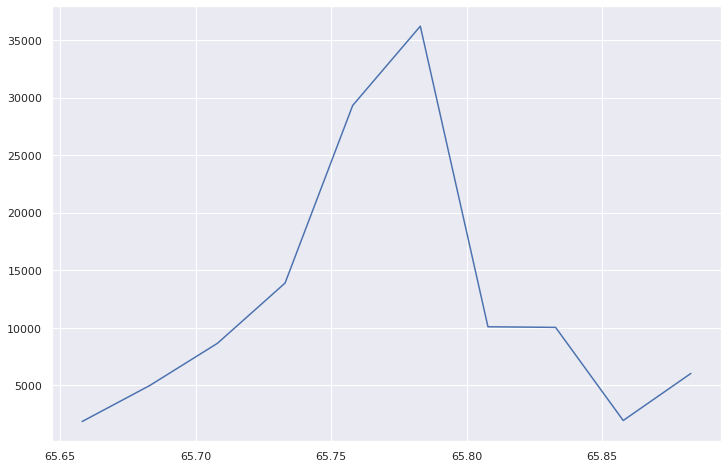

In [72]:
pl.plot(f[2630:2640], p[2630:2640])

In [73]:
for signal_i in df_alpha.columns:
    signala = data_filt[signal_i].copy() 
    fourier = np.fft.rfft(signala)
    fourier[2630:2640] = 0  # 65-66 Hz
    filter_signal = np.fft.irfft(fourier)
    data_filt[signal_i] = filter_signal

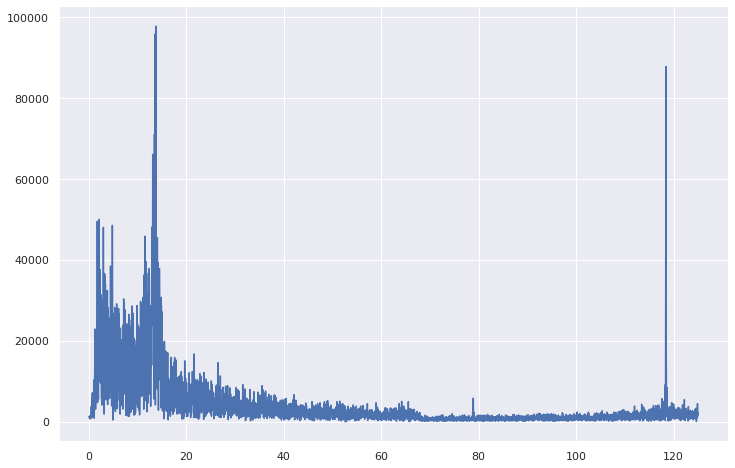

In [74]:
rate = 250.0
#t = np.arange(0, 10014, 1/rate)
x = data_filt.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

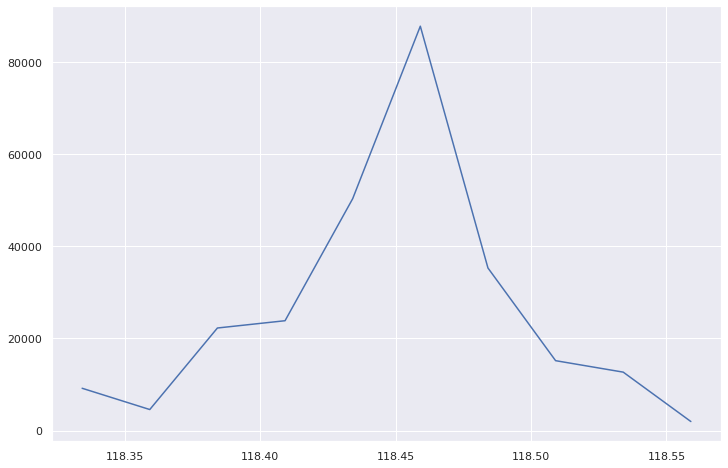

In [89]:
pl.plot(f[4740:4750], p[4740:4750])

In [90]:
for signal_i in df_alpha.columns:
    signala = data_filt[signal_i].copy() 
    fourier = np.fft.rfft(signala)
    fourier[4740:4750] = 0  # 118 Hz
    filter_signal = np.fft.irfft(fourier)
    data_filt[signal_i] = filter_signal

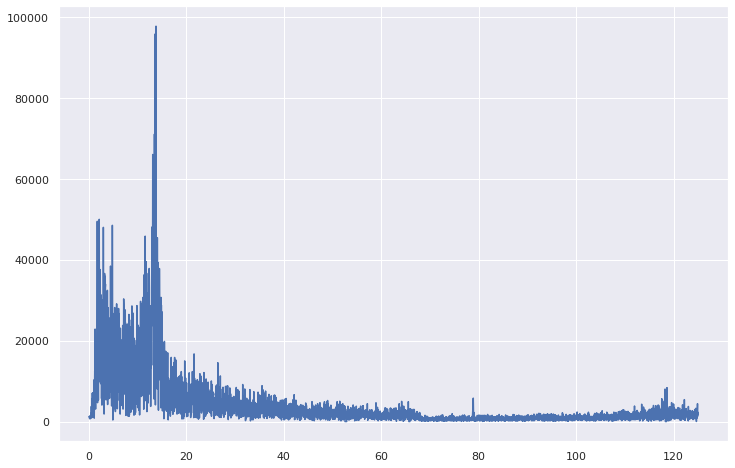

In [91]:
rate = 250.0
#t = np.arange(0, 10014, 1/rate)
x = data_filt.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

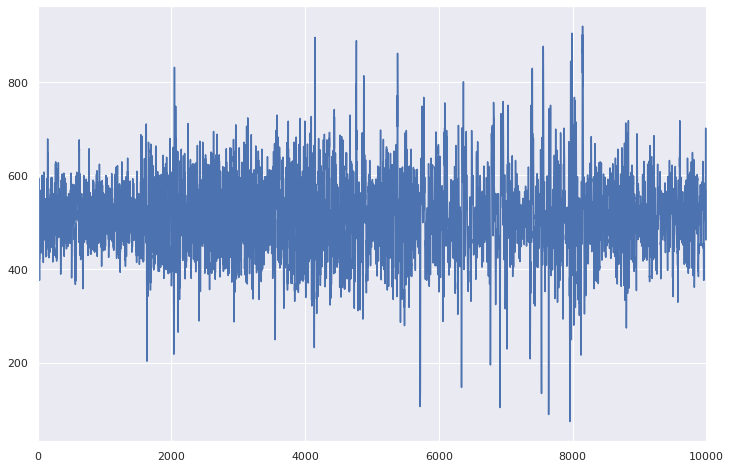

In [92]:
df_alpha.ch5.plot()

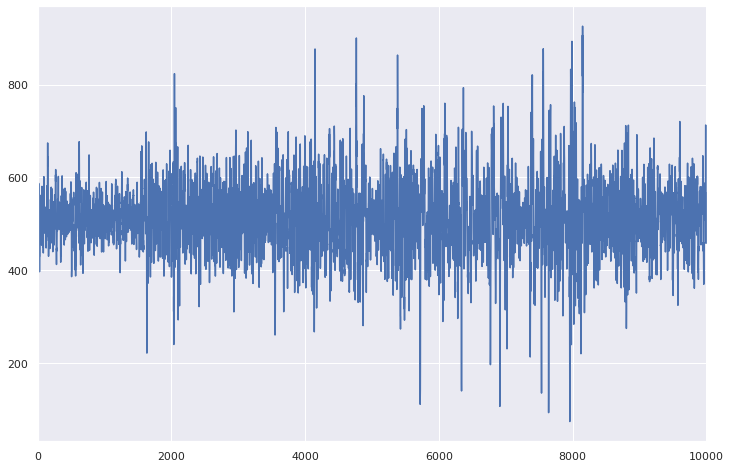

In [93]:
data_filt.ch5.plot()

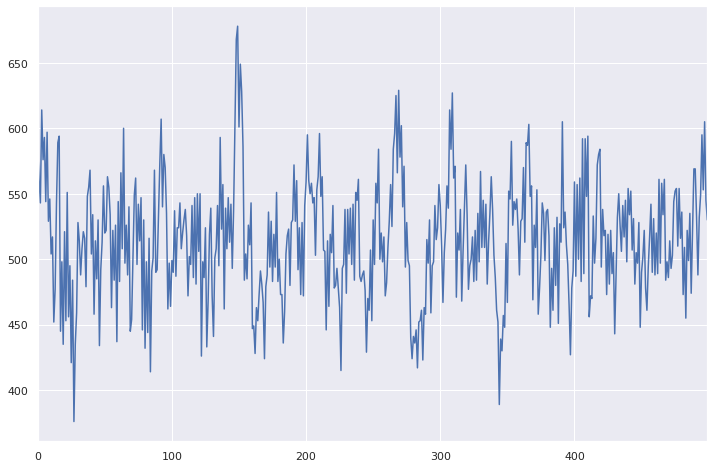

In [97]:
df_alpha.ch5[:500].plot()

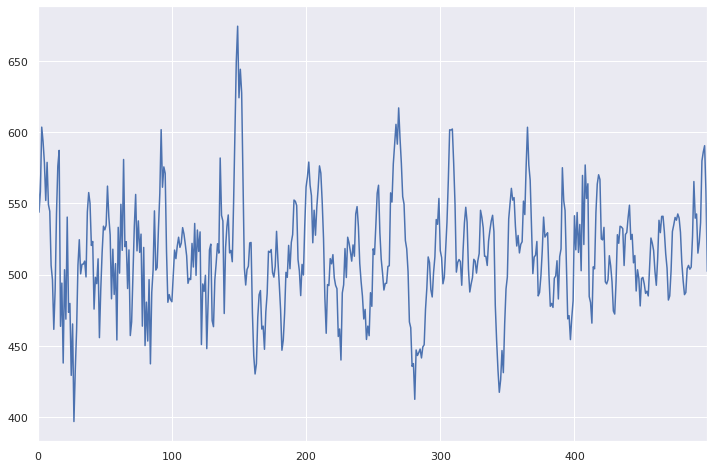

In [96]:
data_filt.ch5[:500].plot()

In [305]:
#fs = 250  # Sampling frequency
# Generate the time vector properly
#t = np.arange(4505) / fs
#data_filt = df.copy()
#for signal_i in df.columns:
#    signala = df[signal_i].copy() # with frequency of 250
#
#    fc = 50  # Cut-off frequency of the filter
#    w = fc / (fs / 2) # Normalize the frequency
#    b, a = signal.butter(1, w)
#    data_filt[signal_i] = signal.filtfilt(b, a, signala)

Код выше - подбор вручную и удаление вручную заданных частот. Теперь давайте напишем фильтр, который будет удалять шумы на заданной частоте по аналогии выше.

In [117]:
def filt_signal(low, high, signal_series, rate=250):
    fourier = np.fft.rfft(signal_series.copy())
    f = np.linspace(0, rate/2, len(fourier))
    high_idx = 0
    low_idx = 0
    for idx in range(len(f)):
        if f[idx] <= high:
            high_idx = idx
        if f[idx] >= low and low_idx == 0:
            low_idx = idx
    fourier[low_idx:high_idx] = 0  
    filter_signal = np.fft.irfft(fourier)
    return filter_signal

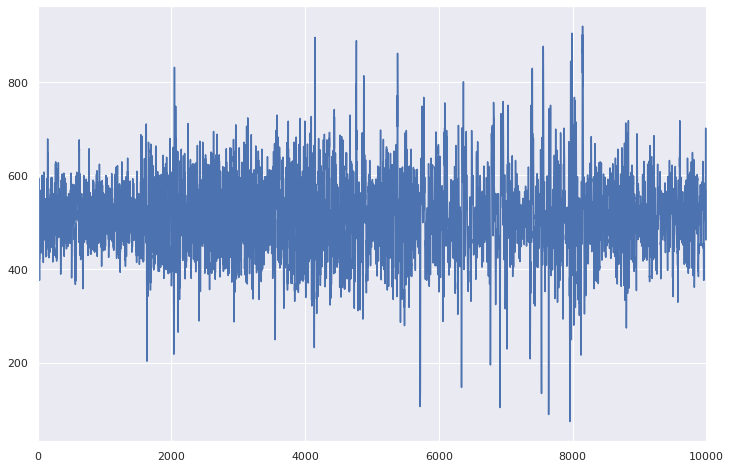

In [100]:
df_alpha.ch5.plot()

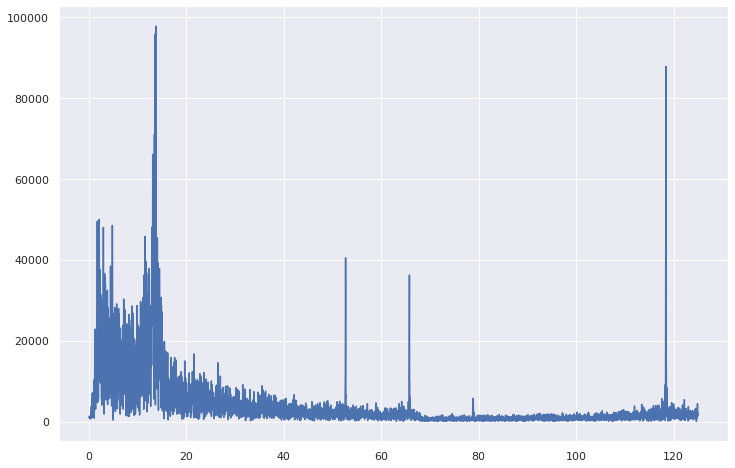

In [102]:
rate = 250.0
#t = np.arange(0, 10014, 1/rate)
x = df_alpha.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

In [139]:
data_filt = df_alpha.copy()

for column in data_filt.columns:
    data_filt[column] = filt_signal(52, 53, data_filt[column]) # filter 52-53 Hz

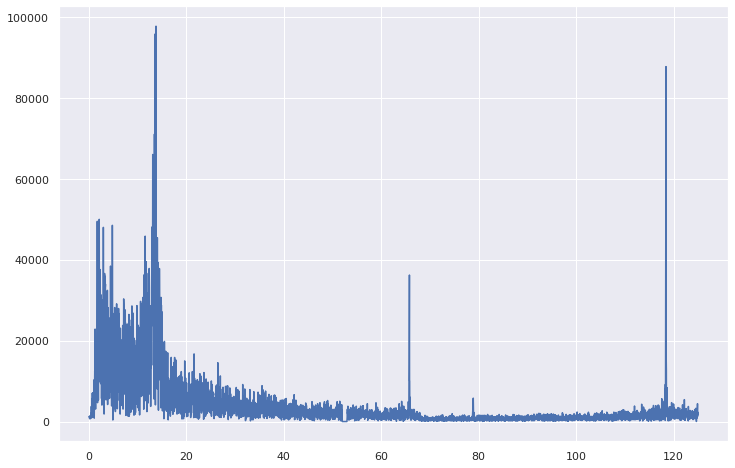

In [119]:
rate = 250.0
#t = np.arange(0, 10014, 1/rate)
x = data_filt.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

In [122]:
for column in df_alpha.columns:
    data_filt[column] = filt_signal(65, 66, data_filt[column]) # filter 65-66 Hz
    data_filt[column] = filt_signal(118, 119, data_filt[column]) # filter 118-119 Hz

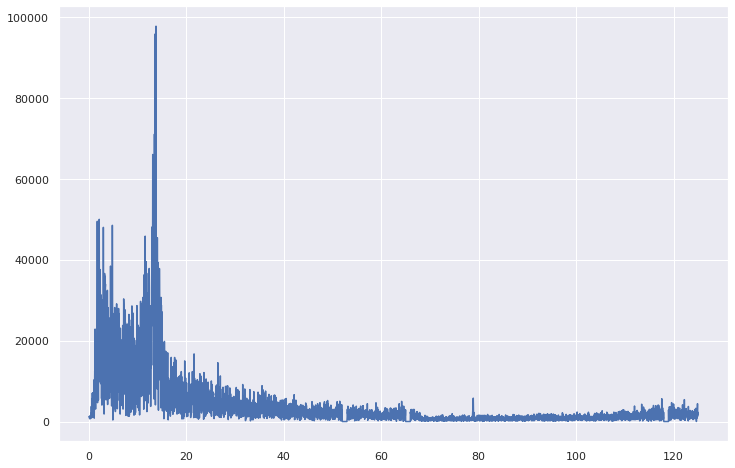

In [123]:
rate = 250.0
x = data_filt.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

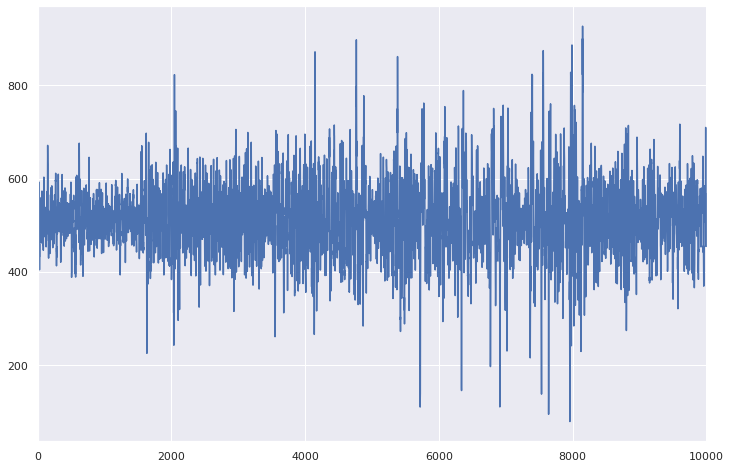

In [124]:
data_filt.ch5.plot()

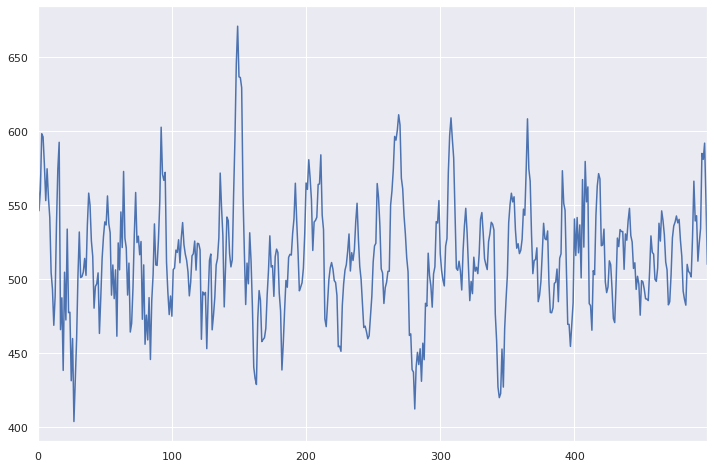

In [125]:
data_filt.ch5[:500].plot()

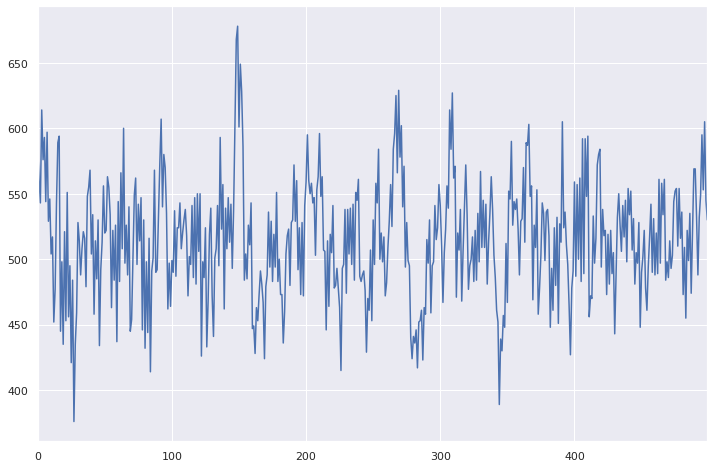

In [126]:
df_alpha.ch5[:500].plot() # row

Чтобы убедиться, что наш фильтр работает на самом деле - проверим его на другом синале

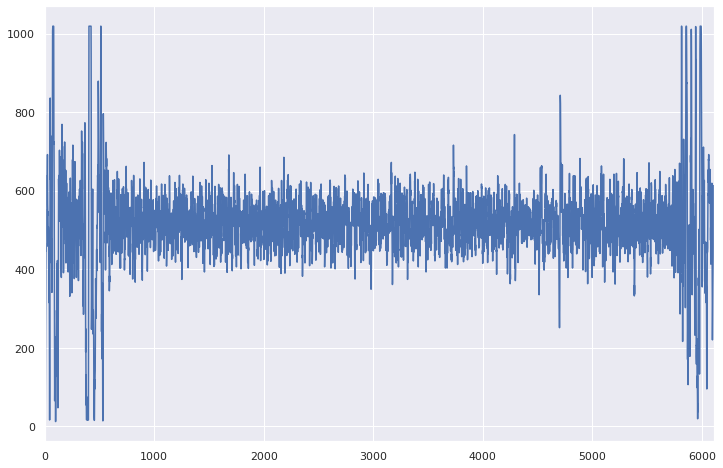

In [130]:
df_beta.ch5.plot()

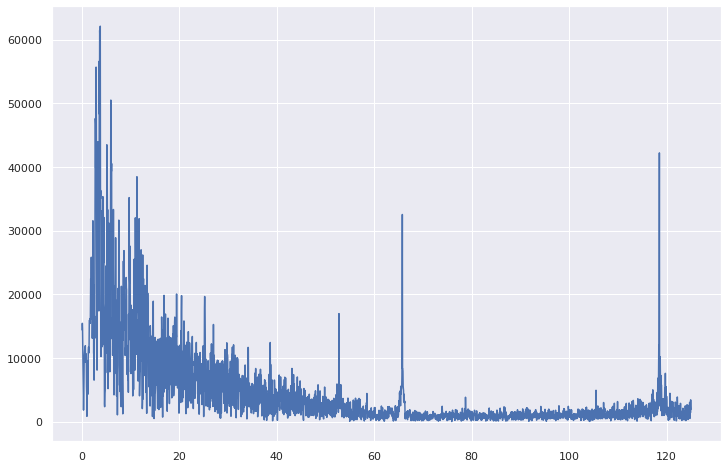

In [132]:
rate = 250.0
x = df_beta.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

In [143]:
data_filt = df_beta.copy()

for column in df_beta.columns:
    data_filt[column] = filt_signal(52, 53, data_filt[column]) # filter 52-53 Hz
    data_filt[column] = filt_signal(65, 66, data_filt[column]) # filter 65-66 Hz
    data_filt[column] = filt_signal(118, 119, data_filt[column]) # filter 118-119 Hz

ValueError: Length of values does not match length of index

In [144]:
fourier = np.fft.rfft(data_filt.ch1)
filter_signal = np.fft.irfft(fourier)
len(filter_signal)

6112

In [145]:
df_beta.ch1.shape

(6113,)

Главная ошибка заключается в том, что фильтрация возвращает сигнал четной длины, а наш сигнал нечетной длины!

In [156]:
if df_beta.ch1.shape[0] % 2 == 1:
    df_beta = df_beta.drop(index=[df_beta.ch1.shape[0] - 1])

In [161]:
data_filt = df_beta.copy()

for column in df_beta.columns:
    data_filt[column] = filt_signal(52, 53, data_filt[column]) # filter 52-53 Hz
    data_filt[column] = filt_signal(65, 66, data_filt[column]) # filter 65-66 Hz
    data_filt[column] = filt_signal(118, 119, data_filt[column]) # filter 118-119 Hz

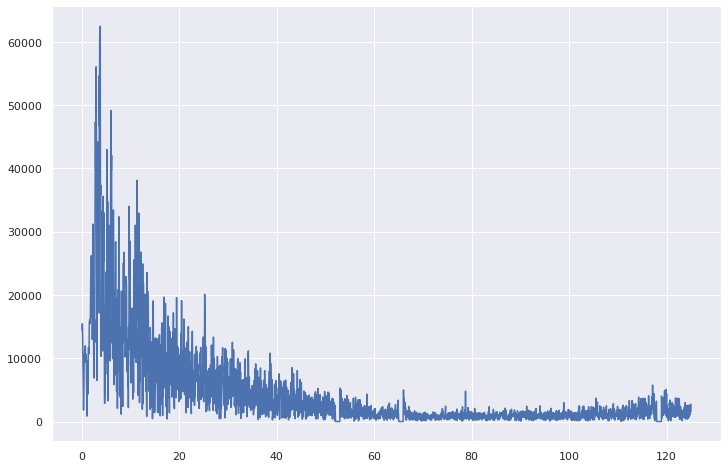

In [162]:
rate = 250.0
x = data_filt.ch5.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

Ура, наша фильтрация работает для любого сигнала. СУКА, МЫ ЭТО НЕ МОГЛИ СДЕЛАТЬ ДВА ДНЯ ХАКАТОНА, А ТЕПЕРЬ Я ЭТО СДЕЛАЛ ЗА ЧАС, НУ КАК БЛЯТЬ!!11!!!